<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot  # Cooks's Distance
import statsmodels.formula.api as smf      # Regression Equation
import numpy as np


In [3]:
# Read the data
cars = pd.read_csv("/content/Cars.csv")

In [5]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

#Correlation

In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


#Scatterplot between variable along with histograms

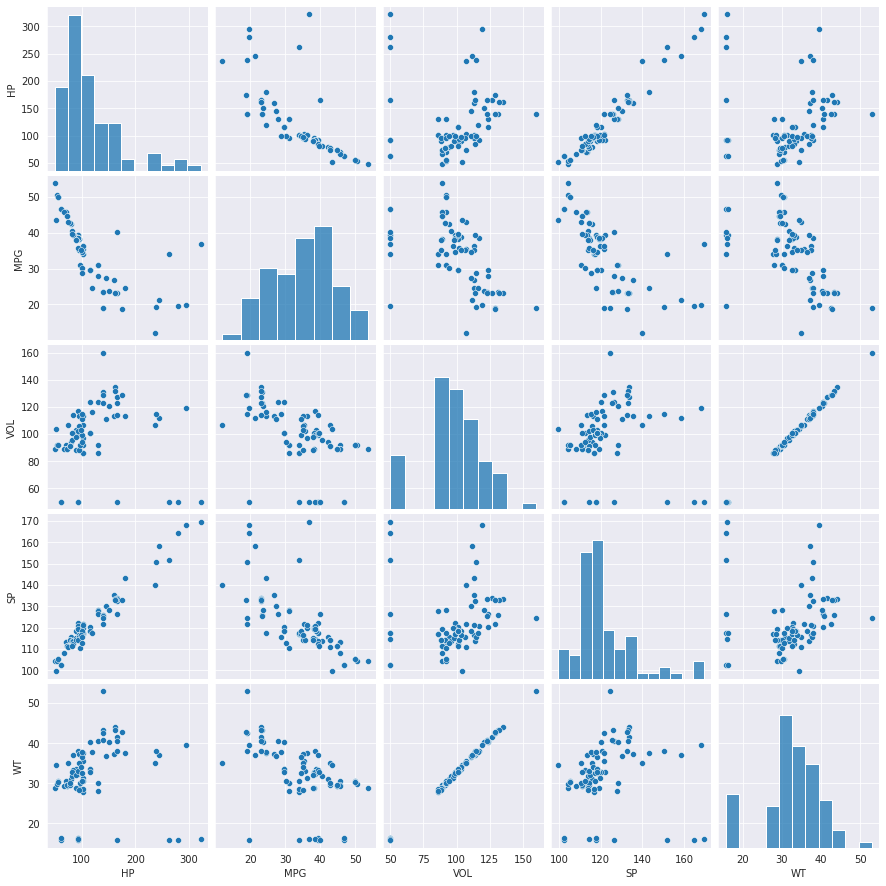

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [10]:
# Build model
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

In [13]:
#Coefficients
model.params    #B0, B1, B2..... B=Bita

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [15]:
#tvalue and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [17]:
#R Square Values
(model.rsquared, model.rsquared_adj)
#R Square value is used to identify if there is any junk variable
#if we add a new irrelevant variable in the equation then the R_sqr_adj will decrease

(0.7705372737359844, 0.7584602881431415)

# Simple Linear Regression Models

In [19]:
ml_v=smf.ols('MPG~VOL', data=cars).fit()
#tValues and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [20]:
ml_w = smf.ols('MPG~WT', data=cars).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [24]:
ml_wv = smf.ols('MPG~WT+VOL', data=cars).fit()

In [25]:
print(ml_wv.tvalues, '\n' , ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculation VIF

In [32]:
rsq_hp = smf.ols('HP~WT+VOL+SP', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols("WT~HP+VOL+SP", data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~HP+SP+WT', data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~HP+VOL+WT', data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

#Storing vif values in a data frame
d1 = {'Variables': ['Hp', 'WT', 'VOL', 'SP'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Residual Analysis

##Test for Normality of Residuals (Q-Q Plot)

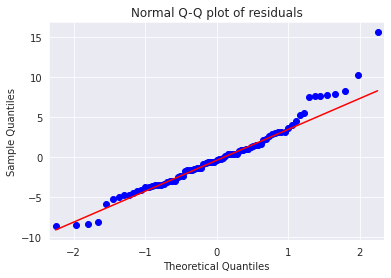

In [33]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line= 'q') # line = 45 to draw diagonal line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [34]:
list(np.where(model.resid>10))

[array([ 0, 76])]

##Residual Plot for Homoscedasticity

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def get_standardize_values( vals ):
    return(vals - vals.mean())/vals.std()

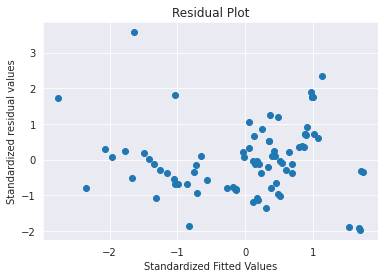

In [40]:
plt.scatter(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

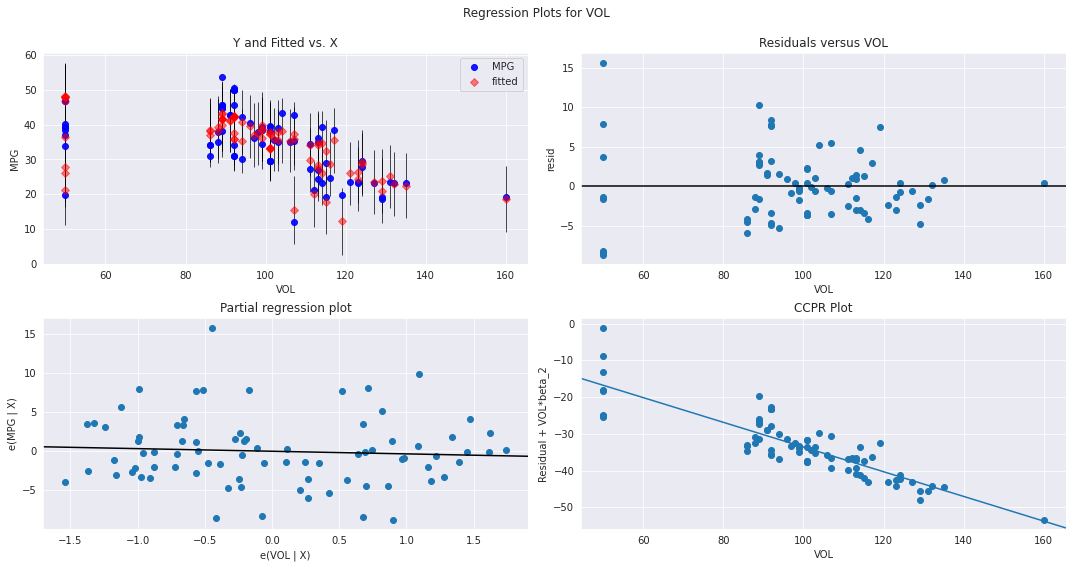

In [41]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

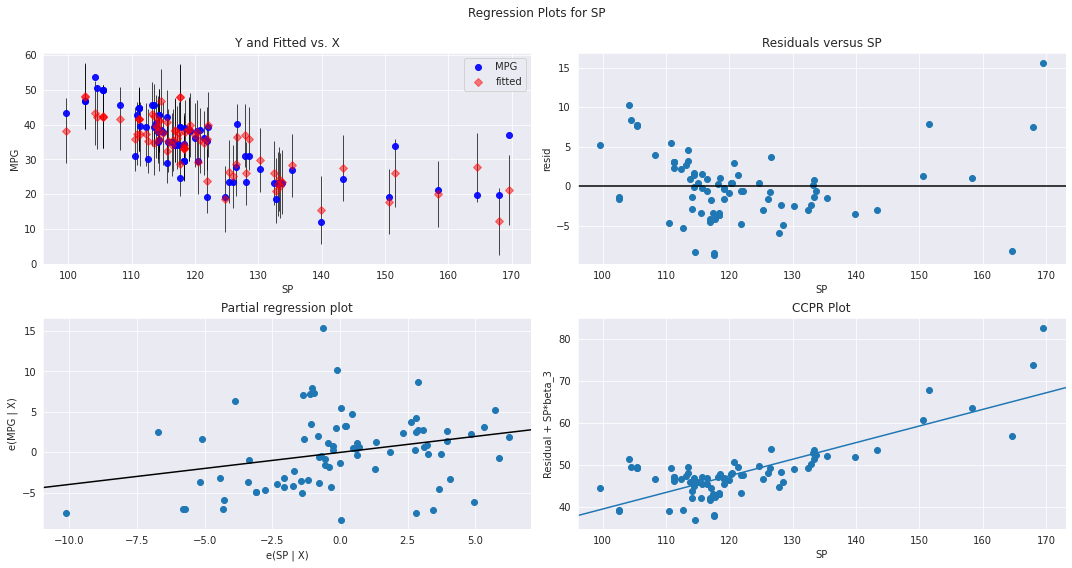

In [42]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

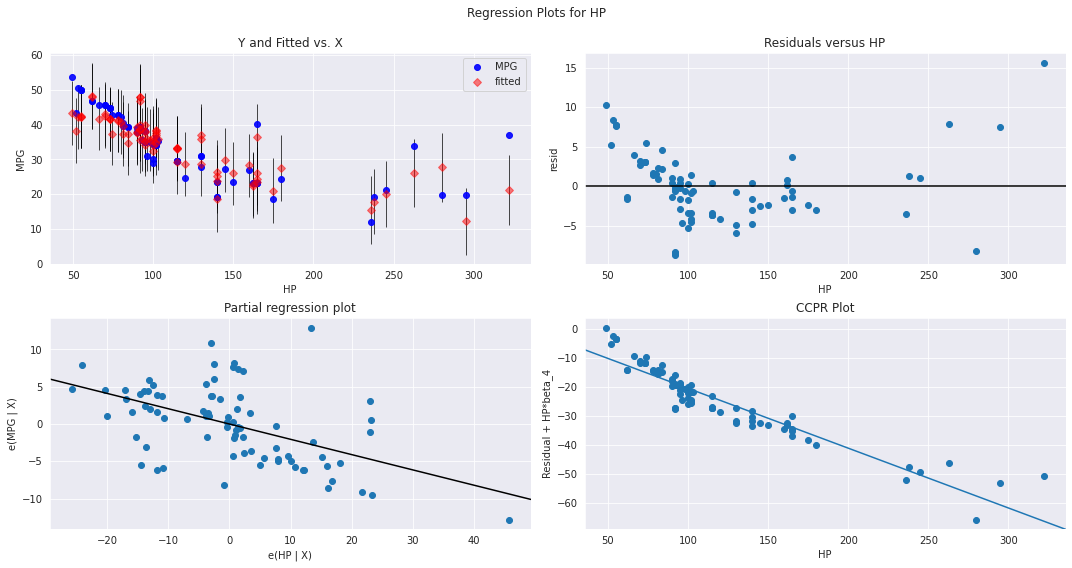

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

# Model Deletion Diagnosistics

###Detecting Influencers/Outliers

In [52]:
model_infulence = model.get_influence()
(c, _) = model_infulence.cooks_distance   #"C" is cooks distance
#from model_infulence.cooks_distance we will get Cook Distance and p-Value 
#but we want only the cook distance value so we have used (c,_), _ means that value will be skipped.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


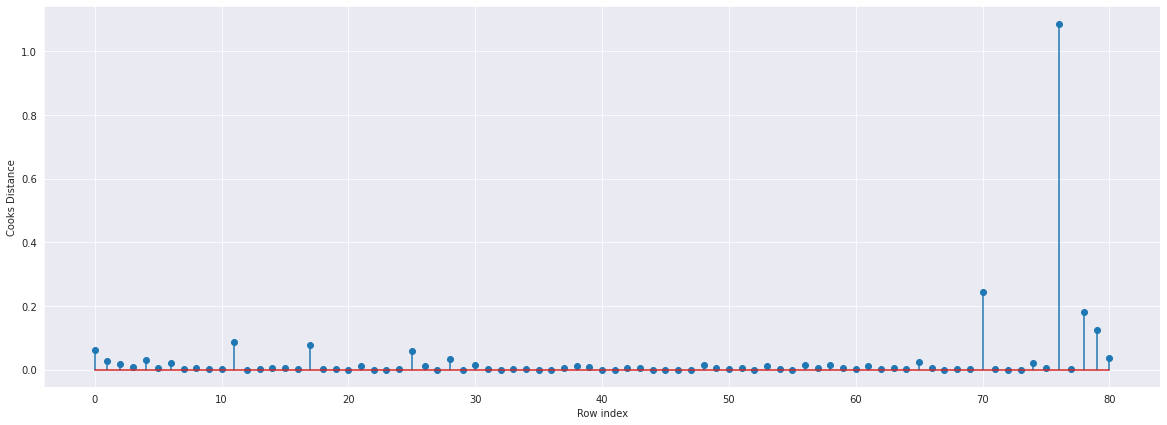

In [48]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
#index and value of influencer where c is mode than .5
#finding the Max value from the data which is outliers, max value is 1.08, 76th observation
(np.argmax(c), np.max(c))

(76, 1.0865193998179943)

#High Influence Point

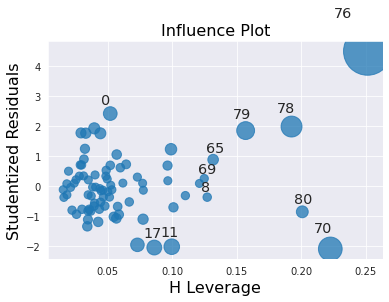

In [56]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [57]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [58]:
leverage_cutoff

0.2222222222222222

##From the above plot, it is evident that data point 70 and 76 are the influencers

In [59]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [60]:
#see the difference in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#Impovind the model

In [62]:
# with the above procedures we have found that the 70 and 76 are the influencers
# we will upload the dataset again and drop those 2 data points and rebult the model

In [61]:
# Load the data
cars_new = pd.read_csv('Cars.csv')

In [65]:
#Discard the data point which are influencers and reasign the row number(reset_index())
car1 = cars_new.drop(cars_new.index[[70,76]], axis=0).reset_index()

In [67]:
car1=car1.drop(['index'], axis=1)

In [68]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


#Build Model

In [69]:
#Exclude variable "WT" and generate R-Square and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP', data= car1).fit()

In [71]:
(final_ml_V.rsquared, final_ml_V.aic)

(0.8161692010376004, 446.11722639447737)

In [72]:
#Exclude variable "VOL" and generate R-Square and AIC values
final_ml_W = smf.ols('MPG~WT+SP+HP', data=car1).fit()

In [73]:
(final_ml_W.rsquared, final_ml_W.aic)

(0.8160034320495304, 446.1884323575031)

Comparing above R-Square and AIC values, model 'final_ml_V has high R-Square and low AIC values hence include variable "VOL" so that milti collinearity problem would be resolved.

# Cook's Distance

In [74]:
model_infulence_V = final_ml_V.get_influence()
(c_V,_) = model_infulence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


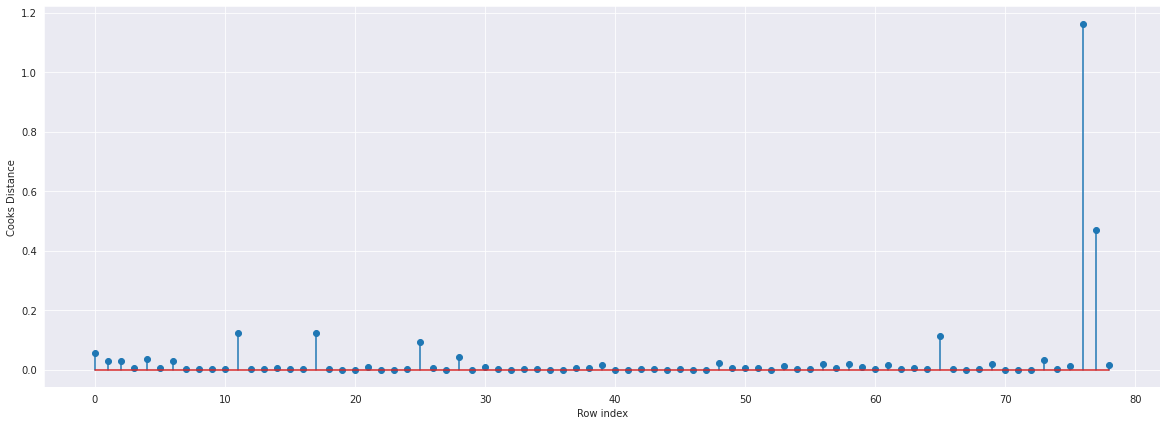

In [75]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)), np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [78]:
#index of the data points where c is more than .5
(np.argmax(c_V), np.max(c_V))
#76th observation and the value is 1.16

(76, 1.1629387469135186)

In [79]:
#Drop 76 and 77 observations
car2 = car1.drop(car1.index[[76,77]], axis=0)

In [80]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [81]:
#Reset the index and re arrange the row values
car3 = car2.reset_index()

In [82]:
car4 = car3.drop(['index'], axis=1)

In [83]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [84]:
#Build the model and the new data
final_ml_V = smf.ols('MPG~VOL+SP+HP', data = car4).fit()

In [85]:
#Again check for influencers
model_infulence_V = final_ml_V.get_influence()
(c_V,_) = model_infulence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


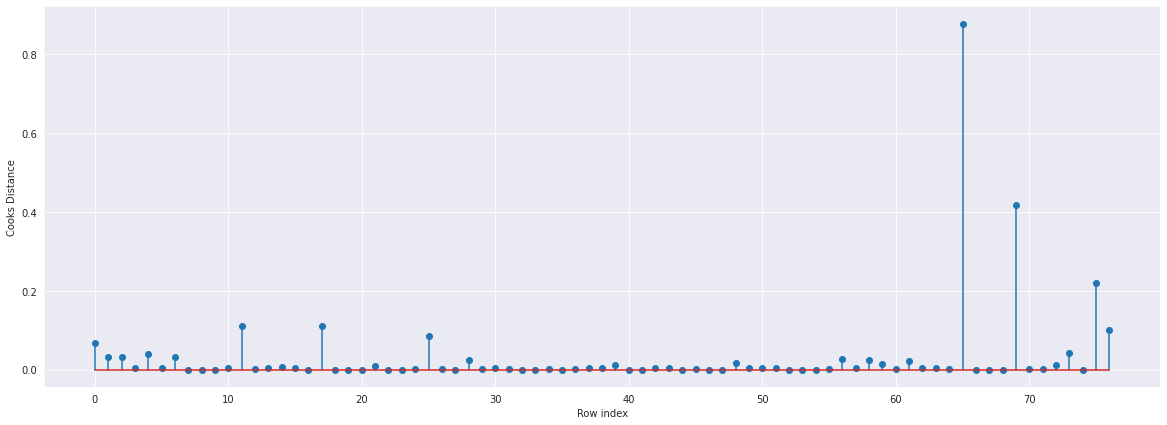

In [86]:
fig = plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(car4)), np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [87]:
# Index of the data point where c is more than .5
(np.argmax(c_V), np.max(c_V))
#the influencer 65th observation with 0.877 value

(65, 0.8774556986296689)

##Since the value is <1, we can stop the diagnostic process and finalize the model

In [88]:
#check the accuracy of the mode
final_ml_V = smf.ols('MPG~VOL+SP+HP', data = car4).fit()

In [89]:
(final_ml_V.rsquared, final_ml_V.aic)

(0.866963611185906, 409.41530627195084)

#Predicting for new data

In [101]:
#New data for prediction
new_data = pd.DataFrame({'HP':40, "VOL":95, "SP":102, "WT":35}, index=[1])

In [102]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

##Result : MPG for the given new data set is 46

In [104]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [105]:
pred_y = final_ml_V.predict(cars_new)

In [106]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64